# Bài 11: Practice 1

In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")

# Display more cols
pd.set_option("display.max_columns", 500)

### 1. Load data
- Load file `superstore_sales.xlsx` vào biến `df`

In [2]:
df = pd.read_excel("data/superstore_sales.xls")

### 2. Inspect data

- Show 3 dòng đầu

In [3]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


- Show 3 dòng cuối

In [4]:
df.tail(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


- Data có bao nhiêu dòng, bao nhiêu cột?

In [5]:
df.shape

(9994, 21)

- In ra list tên các cột

In [6]:
df.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

- Kiểu dữ liệu của từng cột

In [7]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### 3. Transform cột


#### 3.1. Đổi tên cột

- Biến tên cột về dạng chữ thường và snake_case

In [8]:
cols = [re.sub("[ -]", "_", x).lower() for x in df.columns]
df.columns = cols

- In ra 1 dòng đầu để kiểm tra

In [9]:
df.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


#### 3.2. Đổi về datetime

- Chọn ra cột mà tên có chứa `date` và kiểm tra dtype của chúng

In [10]:
df.filter(regex="date").dtypes

order_date    datetime64[ns]
ship_date     datetime64[ns]
dtype: object

- Nếu chưa ở dạng datetime thì đổi thành datetime. Nếu đã ở dạng datetime thì vẫn cứ đổi lại để practice.

In [11]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])

- Kiểm tra kết quả sau khi đổi (run lại câu lệnh trên cùng)

### 4. Trả lời các câu hỏi khác

#### 4.1. Distinct values

- Có bao nhiêu nước và là những nước nào?

In [12]:
df["country"].nunique()

1

In [13]:
df["country"].unique().tolist()

['United States']

- Có bao nhiêu categories và là những categories nào?

In [14]:
df["category"].unique().tolist()

['Furniture', 'Office Supplies', 'Technology']

- Có bao nhiêu subcategories và là những subcategories nào?

In [15]:
df["sub_category"].unique().tolist()

['Bookcases',
 'Chairs',
 'Labels',
 'Tables',
 'Storage',
 'Furnishings',
 'Art',
 'Phones',
 'Binders',
 'Appliances',
 'Paper',
 'Accessories',
 'Envelopes',
 'Fasteners',
 'Supplies',
 'Machines',
 'Copiers']

In [16]:
df["sub_category"].nunique()

17

- Tương tự có bao nhiêu `city`, `region`, `state`, `ship_mode`, `segment` (gợi ý dùng `for`)

In [17]:
for c in ["city", "region", "state", "ship_mode", "segment"]:
    print("{}: {}".format(c, df[c].nunique()))

city: 531
region: 4
state: 49
ship_mode: 4
segment: 3


#### 4.2. Làm việc với ngày tháng

- Data chứa các order trong khoảng thời gian nào?

In [18]:
df["order_date"].agg(["min", "max"])

min   2014-01-03
max   2017-12-30
Name: order_date, dtype: datetime64[ns]

- Mỗi năm có bao nhiêu order (sắp xếp theo thứ tự các năm tăng dần)?

In [19]:
df["order_year"] = df["order_date"].dt.year

In [20]:
df.groupby("order_year").size().sort_index()

order_year
2014    1993
2015    2102
2016    2587
2017    3312
dtype: int64

- Vẽ đồ thị cho thống kê trên

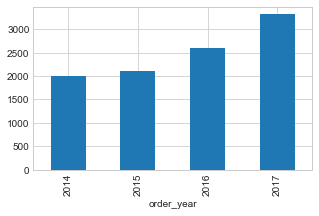

In [21]:
fig, ax = plt.subplots(figsize=(5, 3))
df.groupby("order_year").size().sort_index().plot.bar(ax=ax)
plt.show()

- Mỗi tháng có bao nhiêu order?

In [22]:
df["order_ym"] = df["order_date"].astype(str).str[:7]

In [23]:
df.groupby("order_ym").size().sort_index()

order_ym
2014-01     79
2014-02     46
2014-03    157
2014-04    135
2014-05    122
2014-06    135
2014-07    143
2014-08    153
2014-09    268
2014-10    159
2014-11    318
2014-12    278
2015-01     58
2015-02     64
2015-03    138
2015-04    160
2015-05    146
2015-06    138
2015-07    140
2015-08    159
2015-09    293
2015-10    166
2015-11    324
2015-12    316
2016-01     89
2016-02     83
2016-03    163
2016-04    170
2016-05    225
2016-06    199
2016-07    201
2016-08    176
2016-09    363
2016-10    196
2016-11    370
2016-12    352
2017-01    155
2017-02    107
2017-03    238
2017-04    203
2017-05    242
2017-06    245
2017-07    226
2017-08    218
2017-09    459
2017-10    298
2017-11    459
2017-12    462
dtype: int64

- Vẽ plot cho data trên (bar, line)

In [24]:
data = df.groupby("order_ym").size().sort_index()

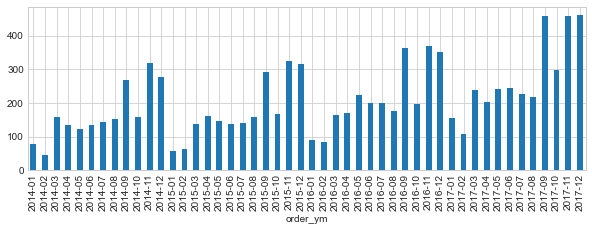

In [25]:
# Bar plot
fig, ax = plt.subplots(figsize=(10, 3))
data.plot.bar(ax=ax)
plt.show()

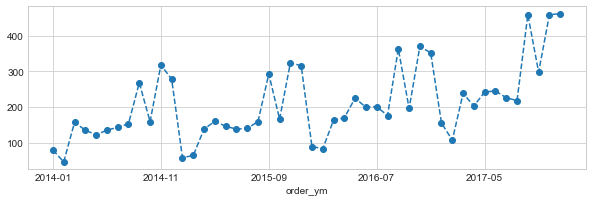

In [26]:
# Line plot
fig, ax = plt.subplots(figsize=(10, 3))
data.plot.line(marker="o", linestyle="dashed", ax=ax)
plt.show()

- Vẽ barplot như trên nhưng alternate màu của 2 năm liên tiếp

In [27]:
df["order_year_odd"] = df["order_year"].apply(lambda x: int(x) % 2)

In [28]:
# Prepare data
data = df.groupby(["order_ym", "order_year_odd"])\
    .size().reset_index()\
    .rename(columns={0: "num_orders"})

In [29]:
# # View
# data

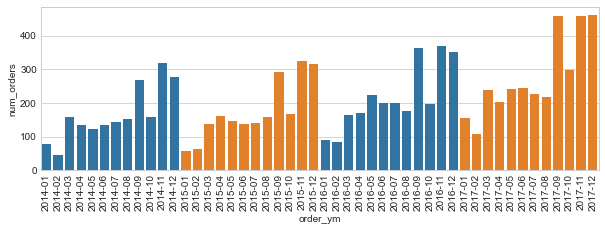

In [30]:
# Bar plot
fig, ax = plt.subplots(figsize=(10, 3))

sns.barplot(
    x="order_ym",
    y="num_orders",
    hue="order_year_odd",
    data=data,
    dodge=False,
    ax=ax
)

# Decorate
xticks = data["order_ym"].tolist()
ax.set_xticklabels(xticks, rotation=90)
ax.get_legend().remove()

plt.show()

- Như yêu cầu trên nhưng vẽ line plot (gợi ý, dùng `sns.pointplot`)

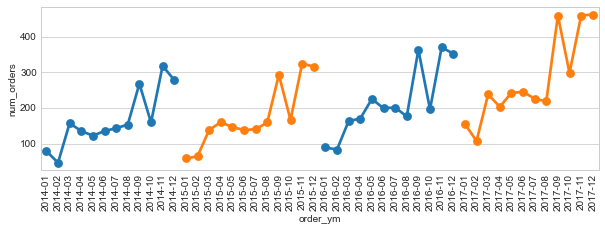

In [31]:
# Point plot
fig, ax = plt.subplots(figsize=(10, 3))

sns.pointplot(
    x="order_ym",
    y="num_orders",
    hue="order_year_odd",
    data=data,
    ax=ax
)

# Decorate
xticks = data["order_ym"].tolist()
ax.set_xticklabels(xticks, rotation=90)
ax.get_legend().remove()

plt.show()

### 4.3. Doanh thu

- Lấy ra các đơn hàng của năm 2017

In [32]:
df_2017 = df.loc[df["order_date"].dt.year == 2017, :].copy()

- Có bao nhiêu đơn hàng?

In [33]:
df_2017.shape[0]

3312

- Số đơn hàng mỗi tháng?

In [34]:
df_2017.groupby("order_ym").size().sort_index()

order_ym
2017-01    155
2017-02    107
2017-03    238
2017-04    203
2017-05    242
2017-06    245
2017-07    226
2017-08    218
2017-09    459
2017-10    298
2017-11    459
2017-12    462
dtype: int64

- Lấy ra top 10 sản phẩm có doanh số cao nhất 2017

In [35]:
# Extract data
top_10_prods = df_2017\
    .groupby(["product_id", "product_name"])["sales"]\
    .sum().nlargest(10)\
    .reset_index()

In [36]:
# View data
top_10_prods

,product_id,product_name,sales
0,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,35699.898
1,OFF-SU-10002881,Martin Yale Chadless Opener Electric Letter Op...,11825.902
2,OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,10943.278
3,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,9239.846
4,TEC-PH-10001459,Samsung Galaxy Mega 6.3,9239.780
5,TEC-MA-10004125,Cubify CubeX 3D Printer Triple Head Print,7999.980
6,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,7371.742
7,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,7220.094
8,OFF-BI-10004995,GBC DocuBind P400 Electric Binding System,7077.148
9,TEC-MA-10000822,Lexmark MX611dhe Monochrome Laser Printer,5609.967


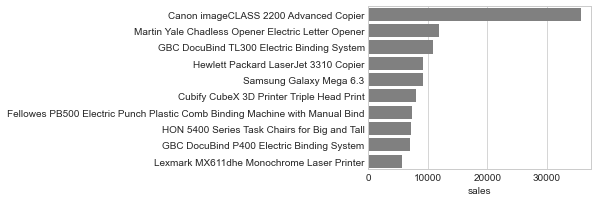

In [37]:
# Plot data
fig, ax = plt.subplots(figsize=(4, 3))

sns.barplot(
    y="product_name",
    x="sales",
    data=top_10_prods,
    color="grey",
    orient="h",
    ax=ax
)

# Decorate
ax.set_ylabel(None)

plt.show()

- Lấy ra top 10 như trên nhưng tô màu theo category

In [38]:
# Extract data
top_10_prods = df_2017\
    .groupby(["product_id", "product_name", "category"])["sales"]\
    .sum().nlargest(10)\
    .reset_index()

In [39]:
# View data
top_10_prods

,product_id,product_name,category,sales
0,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,Technology,35699.898
1,OFF-SU-10002881,Martin Yale Chadless Opener Electric Letter Op...,Office Supplies,11825.902
2,OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,Office Supplies,10943.278
3,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,Technology,9239.846
4,TEC-PH-10001459,Samsung Galaxy Mega 6.3,Technology,9239.780
5,TEC-MA-10004125,Cubify CubeX 3D Printer Triple Head Print,Technology,7999.980
6,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,7371.742
7,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,Furniture,7220.094
8,OFF-BI-10004995,GBC DocuBind P400 Electric Binding System,Office Supplies,7077.148
9,TEC-MA-10000822,Lexmark MX611dhe Monochrome Laser Printer,Technology,5609.967


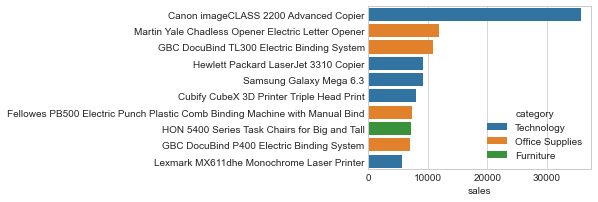

In [40]:
# Plot data
fig, ax = plt.subplots(figsize=(4, 3))

sns.barplot(
    y="product_name",
    x="sales",
    data=top_10_prods,
    hue="category",
    dodge=False,
    orient="h",
    ax=ax
)

# Decorate
ax.set_ylabel(None)

plt.show()

- Lọc ra top 5 sub-categories có Sales nhiều nhất trong năm 2017

In [41]:
top_5_subcats = df_2017\
    .groupby("sub_category")["sales"].sum()\
    .nlargest(5).reset_index()

In [42]:
# View data
top_5_subcats

,sub_category,sales
0,Phones,105340.516
1,Chairs,95554.353
2,Binders,72788.045
3,Storage,69677.618
4,Copiers,62899.388


- Vẽ barplot cho sales của 5 sub-categories theo từng năm từ năm 2014-2017

In [43]:
top_5_subcats_list = top_5_subcats["sub_category"].tolist()
print(top_5_subcats_list)

['Phones', 'Chairs', 'Binders', 'Storage', 'Copiers']


In [44]:
# Prepare data
data = df.loc[df["sub_category"].isin(top_5_subcats_list), :]\
    .groupby(["sub_category", "order_year"])["sales"]\
    .sum().reset_index()

In [45]:
# View data
data

,sub_category,order_year,sales
0,Binders,2014,43488.265
1,Binders,2015,37453.098
2,Binders,2016,49683.325
3,Binders,2017,72788.045
4,Chairs,2014,77241.576
5,Chairs,2015,71734.529
6,Chairs,2016,83918.645
7,Chairs,2017,95554.353
8,Copiers,2014,10849.782
9,Copiers,2015,26179.450


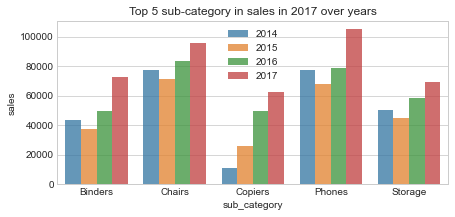

In [46]:
fig, ax = plt.subplots(figsize=(7, 3))

# Plot
sns.barplot(
    x="sub_category",
    y="sales",
    hue="order_year",
    data=data,
    alpha=.75,
    ax=ax
)

# # Decorate
ax.set_title("Top 5 sub-category in sales in 2017 over years") # Dodge
plt.legend(loc="best")

plt.show()

- Vẽ boxplot của doanh số daily từng category theo các năm

In [47]:
data = df.groupby(["category", "order_date"])["sales"]\
    .sum().reset_index()

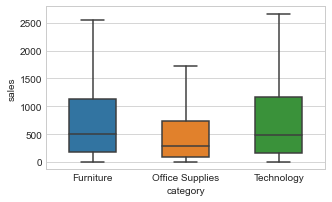

In [48]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.boxplot(
    x="category",
    y="sales",
    data=data,
    width=0.5,
    showfliers=False
)

plt.show()

- Vẽ KDE của doanh số daily từng category theo các năm

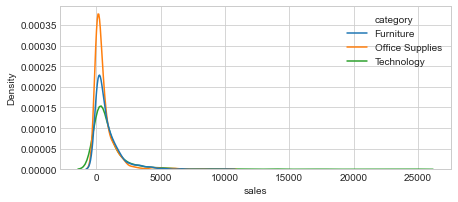

In [49]:
fig, ax = plt.subplots(figsize=(7, 3))

sns.kdeplot(
    x="sales",
    hue="category",
    data=data
)

plt.show()

- Vẽ daily sales against daily quantity

In [50]:
# Prepare data
data = df.groupby("order_date")[["sales", "quantity"]]\
    .sum().reset_index()

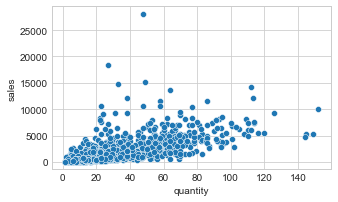

In [51]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.scatterplot(
    x="quantity",
    y="sales",
    data=data
)

plt.show()

- Vẽ daily sales against daily quantity (từ category ra riêng từng subplots)

In [52]:
data = df.groupby(["category", "order_date"])[["sales", "quantity"]]\
    .sum().reset_index()

In [53]:
cats = data["category"].unique().tolist()
cats

['Furniture', 'Office Supplies', 'Technology']

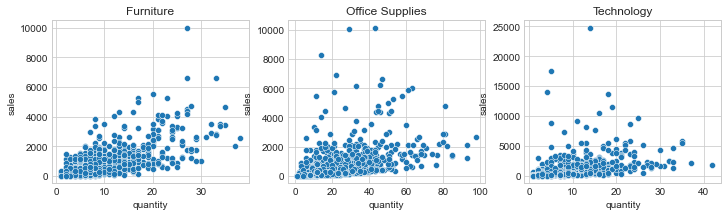

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

for i, cat in enumerate(cats):
    tmp_data = data.loc[data["category"] == cat, :]

    sns.scatterplot(
        x="quantity",
        y="sales",
        data=tmp_data,
        ax=ax[i]
    )
    
    ax[i].set_title(cat)

plt.show()

- Lọc ra các đơn hàng bị chuyển chậm hơn 3 ngày

In [55]:
df["wait_days"] = (df["ship_date"] - df["order_date"]).dt.days

In [56]:
df_late_3d = df.loc[df["wait_days"] > 3, :].copy()

- Có bao nhiêu đơn như vậy

In [57]:
df_late_3d.shape[0]

6767

- Đơn hàng trễ nhất là bao lâu?

In [58]:
df["wait_days"].max()

7

- Vẽ boxplot thời gian chờ cho từng `region`

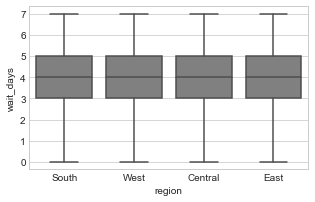

In [59]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.boxplot(
    x="region",
    y="wait_days",
    data=df,
    color="grey"
)

plt.show()

- Vẽ boxplot thời gian chờ cho từng `ship_mode`

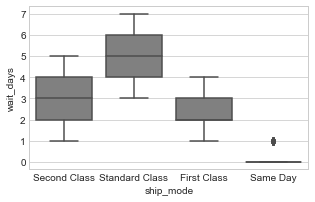

In [60]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.boxplot(
    x="ship_mode",
    y="wait_days",
    data=df,
    color="grey"
)

plt.show()

- Điều chỉnh lại subplots trên sao cho box xếp theo thứ tự `Same day`, `First Class`, `Second Class`, `Standard Class`

In [61]:
categories = ["Same Day", "First Class", "Second Class", "Standard Class"]
df["ship_mode"] = pd.Categorical(df["ship_mode"], categories=categories)

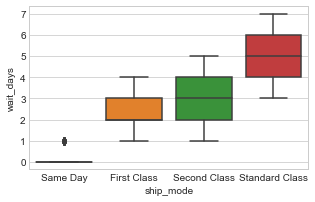

In [69]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.boxplot(
    x="ship_mode",
    y="wait_days",
    data=df,
    ax=ax
)

plt.show()